In [1]:
import os 
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imageio as io
from PIL import Image
import skimage.io
import cv2

In [2]:
path = str(r'C:\Users\pizza\Desktop\DSSS\Homework2\Mini_BAGLS_dataset')

print(path)

C:\Users\pizza\Desktop\DSSS\Homework2\Mini_BAGLS_dataset


In [3]:
# get all filenames
files = os.listdir(path) #This method returns a list containing the names of the entries in the directory given by path.

# what is os.listdir() returning?
# type ==> list()
print(type(files))

#files

<class 'list'>


In [4]:
# pathlib is a nice library to work with paths
from pathlib import Path
path_pathlib = Path(path)
path_pathlib

WindowsPath('C:/Users/pizza/Desktop/DSSS/Homework2/Mini_BAGLS_dataset')

In [5]:
filenames = [f for f in files if '.meta' in f]

In [6]:
import random
randomlist = []
for i in range(0,4):
    n = random.randint(0,99)
    randomlist.append(n)
print(randomlist)

[71, 33, 94, 1]


In [7]:
# another way to combine os.listdir() and the for loop in one line --> use glob
import glob
glob_filenames = glob.glob(path + "/*.meta")
#glob_filenames

In [40]:
import pandas as pd

# get all meta data information 
all_meta_data = []

for f in glob_filenames:
    # open .meta file
    meta_file = open(f)
    meta_data = json.load(meta_file)
    all_meta_data.append(meta_data)
    
df = pd.DataFrame(all_meta_data)

# TASK 1 AND 2 (COMBINED)

[66, 97, 26, 89]


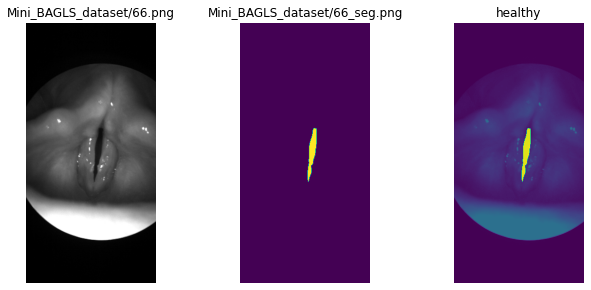

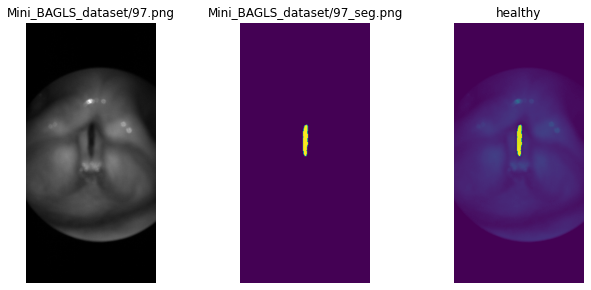

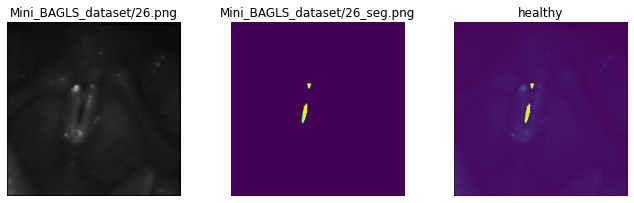

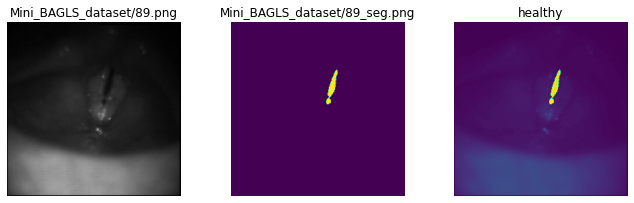

In [64]:
import random
randomlist = []
for i in range(0,4):
    n = random.randint(0,99)
    randomlist.append(n)
print(randomlist)

for f in randomlist:
    
    img_path = "Mini_BAGLS_dataset/"+ str(f) + ".png"
    seg_path = "Mini_BAGLS_dataset/"+ str(f) + "_seg.png"
    meta_path = "Mini_BAGLS_dataset/"+ str(f) + ".meta"
    
    img = skimage.io.imread(img_path)
    c=img[:,:,1]
    seg = skimage.io.imread(seg_path)
    overlayed_pics = np.ubyte(0.2*c + 0.5*seg)
    
    meta_file = open(meta_path)
    meta_data = json.load(meta_file)
    all_meta_data.append(meta_data)
    df = pd.DataFrame(all_meta_data)
    title=df.loc[f,"Subject disorder status"]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
    ax1.axis("off"); ax2.axis("off"); ax3.axis("off")
    ax1.imshow(img);ax2.imshow(seg); ax3.imshow(overlayed_pics)
    fig.tight_layout(pad=5.0)
    ax1.title.set_text(img_path); ax2.title.set_text(seg_path); ax3.title.set_text(title)
    plt.show()

    

# TASK 3

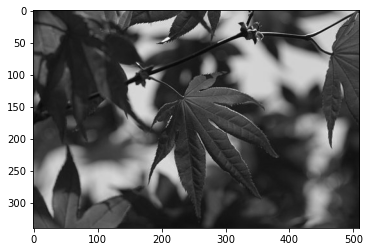

In [34]:
import imageio as io
from PIL import Image
import skimage.io #this is changed from skimage to skimage.io in Windows 10
import cv2

## load image with different libraries
img_path = str(r'C:\Users\pizza\Desktop\DSSS\Homework2\leaves.jpg')
#img = io.imread(img_path)
#img = Image.open(img_path)
#img = skimage.io.imread(img_path)
#img = cv2.imread(img_path); img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# load image as grayscale
img = skimage.io.imread(img_path, as_gray=True)
plt.imshow(img, cmap='gray')


######### AVERAGE METHODE #####
import numpy as np
from scipy import misc

import matplotlib.pyplot as plt


img_ref = io.imread(img_path)


img_avg = io.imread(img_path)
#photo_data = misc.imread(img_path)
x,y,z=img_avg.shape ## where z is the RGB dimension### Method block begin 
img_avg[:] = img_avg.mean(axis=-1,keepdims=1) 
### Method Block ends plt.figure(figsize=(10,20))
plt.imshow(img_avg)
##########




######### LUMINOSITY METHOD #########
img_lum = io.imread(img_path)
W = [0.21,0.72,0.07] # weights
W_mean = np.tensordot(img_lum,W, axes=((-1,-1)))[...,None]

img_lum[:] = W_mean.astype(img.dtype)
plt.imshow(img_lum)

#####LIGHTNESS 

img_light=io.imread(img_path)

img_light[:] = np.max(img_light,axis=-1,keepdims=1)/2+np.min(img_light,axis=-1,keepdims=1)/2


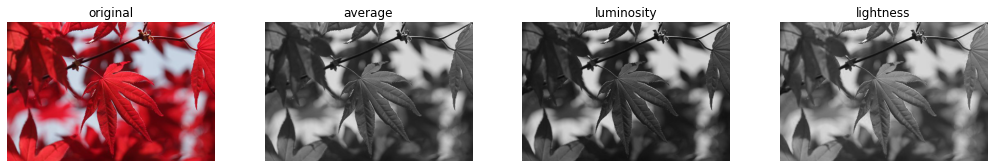

In [75]:



fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))
ax1.axis("off"); ax2.axis("off"); ax3.axis("off");ax3.axis("off");ax4.axis("off")
ax1.imshow(img_ref);ax2.imshow(img_avg); ax3.imshow(img_lum); ax4.imshow(img_light)
fig.tight_layout(pad=5.0)
ax1.title.set_text("original"); ax2.title.set_text("average"); ax3.title.set_text("luminosity"); ax4.title.set_text("lightness")




# new_img.save("new.png","PNG")

In [36]:
def psnr(img1, img2):
    #mean squared error:
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return "MSE is zero"
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

In [39]:
print(psnr(img_ref, img_avg))
print(psnr(img_ref, img_lum))
print(psnr(img_ref, img_light))
print(psnr(img_ref, img_ref))


27.804391879186504
28.138482511756557
27.60718138322941
MSE is zero
